In [1]:
# Import Gensim Library
import sys
if 'gensim.downloader' not in sys.modules:
  try:
    import gensim.downloader as api
  except:
    !pip install gensim
    import gensim.downloader as api
  finally:
    glove = api.load("glove-wiki-gigaword-50")
else:
  print('gensim Already imported')
  glove = api.load("glove-wiki-gigaword-50")

import numpy as np
import scipy
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import pandas as pd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 74.9 MB/s eta 0:00:00
[==================================================] 100.0% 66.0/66.0MB downloaded


In [2]:
print(f'Glove Dictionary contains {len(glove.key_to_index.keys()):,} items')

Glove Dictionary contains 400,000 items


In [3]:
glove.vectors.shape

(400000, 50)

In [4]:
glove.key_to_index["penthouse"]

26972

In [5]:
glove.get_index("penthouse")

26972

In [6]:
glove.index_to_key[26972]

'penthouse'

# Explore embeddings matrix

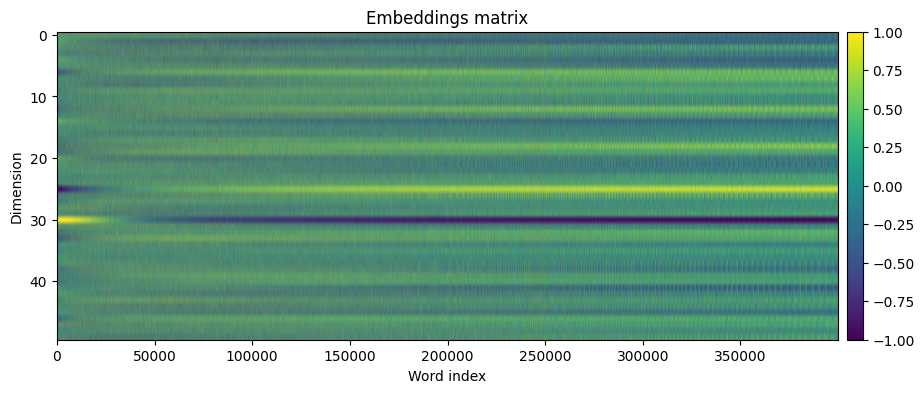

In [7]:
plt.figure(figsize=(12,4))
plt.imshow(glove.vectors.T,vmin=-1,vmax=1,aspect='auto')
plt.gca().set(ylabel='Dimension',xlabel='Word index',title='Embeddings matrix')
plt.colorbar(pad=.01)
plt.show()

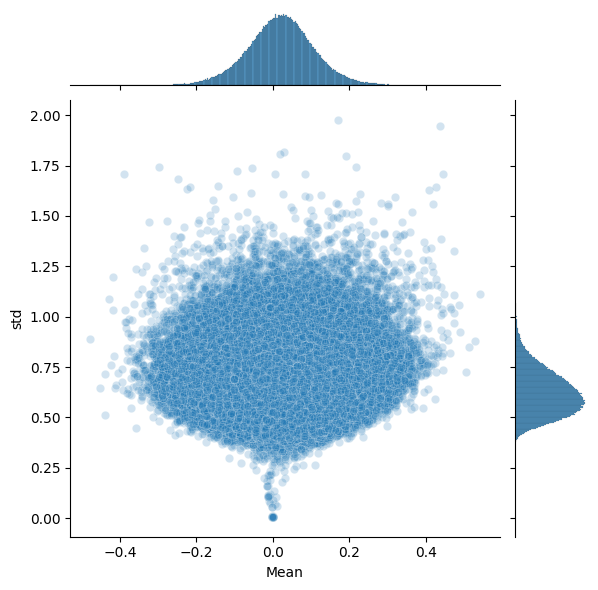

In [8]:
# mean and std across each embedding dim
emb_mean = glove.vectors.mean(axis=1)
emb_std  = glove.vectors.std(axis=1)

df = pd.DataFrame(np.vstack((emb_mean,emb_std)).T,columns=['Mean','std'])

sns.jointplot(x='Mean',y='std',data=df,alpha=.2)
plt.show()

In [9]:
glove.vectors.shape

(400000, 50)

In [10]:
glove["apple"]

array([ 0.52042 , -0.8314  ,  0.49961 ,  1.2893  ,  0.1151  ,  0.057521,
       -1.3753  , -0.97313 ,  0.18346 ,  0.47672 , -0.15112 ,  0.35532 ,
        0.25912 , -0.77857 ,  0.52181 ,  0.47695 , -1.4251  ,  0.858   ,
        0.59821 , -1.0903  ,  0.33574 , -0.60891 ,  0.41742 ,  0.21569 ,
       -0.07417 , -0.5822  , -0.4502  ,  0.17253 ,  0.16448 , -0.38413 ,
        2.3283  , -0.66682 , -0.58181 ,  0.74389 ,  0.095015, -0.47865 ,
       -0.84591 ,  0.38704 ,  0.23693 , -1.5523  ,  0.64802 , -0.16521 ,
       -1.4719  , -0.16224 ,  0.79857 ,  0.97391 ,  0.40027 , -0.21912 ,
       -0.30938 ,  0.26581 ], dtype=float32)

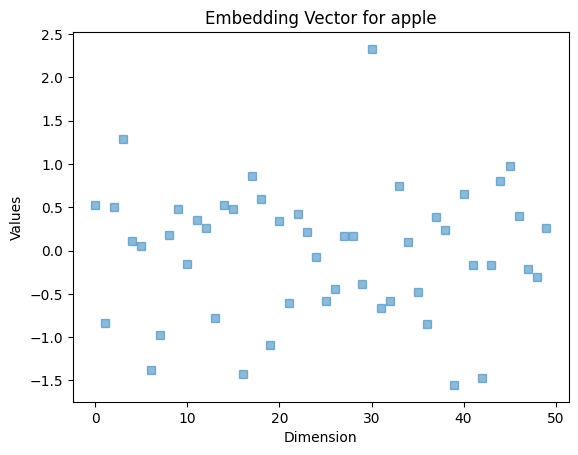

In [11]:
plt.plot(glove["apple"],'s', alpha=0.5)
plt.gca().set(xlabel="Dimension", ylabel="Values", title="Embedding Vector for apple")
plt.show()

# Relationship across embedding vectors

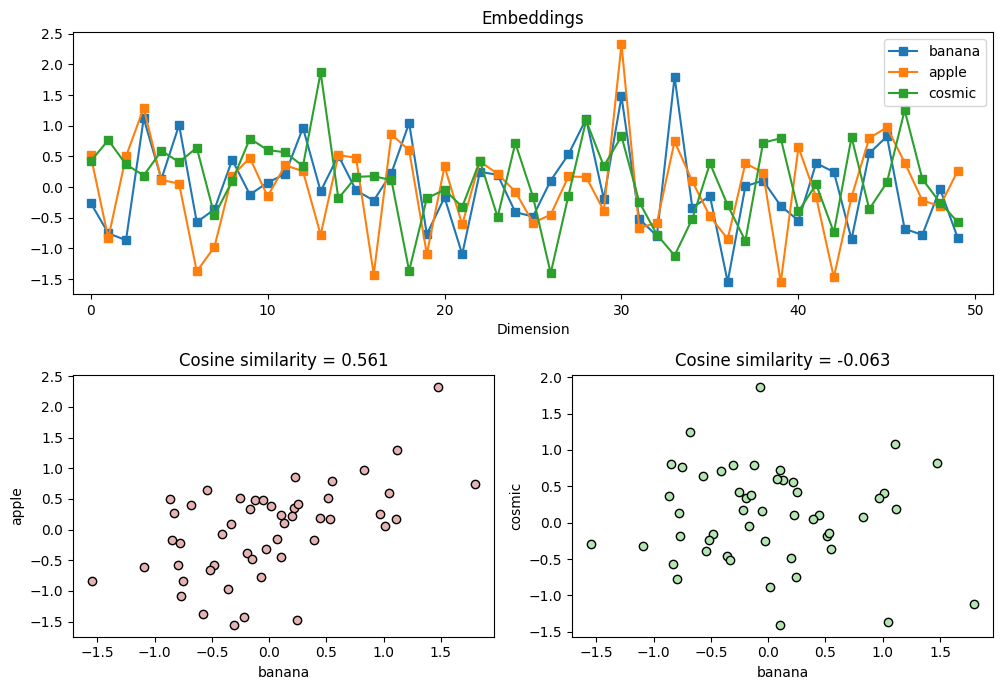

In [12]:
# pick three words
word1 = 'banana'
word2 = 'apple'
word3 = 'cosmic'


# setup the figure subplot geometry
fig = plt.figure(figsize=(10,7))
gs = GridSpec(2,2)
ax0 = fig.add_subplot(gs[0,:])
ax1 = fig.add_subplot(gs[1,0])
ax2 = fig.add_subplot(gs[1,1])

# plot the embeddings by dimension
for idx,word in enumerate([word1,word2,word3]):
  ax0.plot(glove[word],'s-',label=word)

ax0.set(xlabel='Dimension',title='Embeddings',xlim=[-1,glove.vectors.shape[1]+1])
ax0.legend()


# plot the embeddings by each other
cossim = glove.similarity(word1,word2)
ax1.plot(glove[word1],glove[word2],'ko',markerfacecolor=[.9,.7,.7])
ax1.set(xlabel=word1,ylabel=word2,title=f'Cosine similarity = {cossim:.3f}')

cossim = glove.similarity(word1,word3)
ax2.plot(glove[word1],glove[word3],'ko',markerfacecolor=[.7,.9,.7])
ax2.set(xlabel=word1,ylabel=word3,title=f'Cosine similarity = {cossim:.3f}')

# final touches
plt.tight_layout()
plt.show()

# Methods to identify similar and dissimilar words

In [13]:
# most similar words ("similar" is high cosine similarity)
glove.most_similar('fashion',topn=9)

[('style', 0.7607343792915344),
 ('fashions', 0.7528777122497559),
 ('designer', 0.7515820860862732),
 ('chic', 0.7511470913887024),
 ('designers', 0.7450659275054932),
 ('shows', 0.7221301794052124),
 ('couture', 0.7165464758872986),
 ('glamour', 0.7155618667602539),
 ('show', 0.7142423391342163)]

In [14]:
# One these things is not like the others...
lists = [ [ 'apple','banana','pirate','peach' ],
          [ 'apple','banana','peach','kiwi','starfruit' ],
          [ 'apple','banana','pirate','peach','kiwi','starfruit' ],
          [ 'apple','banana','orange','kiwi' ]
        ]

for l in lists:
  print(f'In the word list {l}:')
  print(f'  The most similar word is "{glove.most_similar(l,topn=1)[0][0]}"')
  print(f'  and the non-matching word is "{glove.doesnt_match(l)}"\n')

In the word list ['apple', 'banana', 'pirate', 'peach']:
  The most similar word is "mango"
  and the non-matching word is "pirate"

In the word list ['apple', 'banana', 'peach', 'kiwi', 'starfruit']:
  The most similar word is "mango"
  and the non-matching word is "starfruit"

In the word list ['apple', 'banana', 'pirate', 'peach', 'kiwi', 'starfruit']:
  The most similar word is "mango"
  and the non-matching word is "starfruit"

In the word list ['apple', 'banana', 'orange', 'kiwi']:
  The most similar word is "juice"
  and the non-matching word is "kiwi"

